Average Order Value (AOV) Over Time (Monthly Trend) Scenario: The Sales Team wants to track how the Average Order Value (AOV) has changed month over month in 2022. Requirements: • Create a line chart that shows the AOV trend over time. • Use the formula SUM(after_discount) / COUNT_DISTINCT(id) to calculate AOV. • Filter the data for the year 2022 and group by month. • Display the AOV trend for each month. Key Features to Use: • order_date (for time-based grouping) • after_discount • id

📊 Average Order Value (AOV) per Month in 2022:
   year_month           AOV
0     2022-01  1.129934e+06
1     2022-02  1.084185e+06
2     2022-03  1.285488e+06
3     2022-04  1.854963e+06
4     2022-05  1.350980e+06
5     2022-06  1.078340e+06
6     2022-07  1.146387e+06
7     2022-08  5.369886e+06
8     2022-09  5.895757e+06
9     2022-10  1.091983e+06
10    2022-11  1.221154e+06
11    2022-12  9.606671e+05


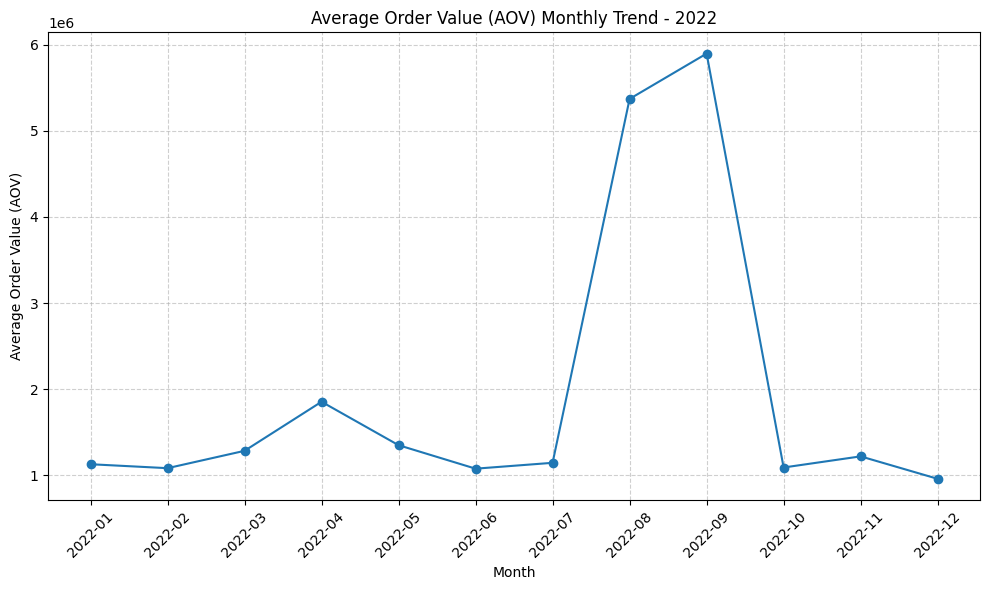

In [1]:
# 📌 Task: Average Order Value (AOV) Monthly Trend in 2022

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load dataset
file_path = r"C:\Users\bhave\OneDrive\Desktop\dashboard\dataset2\finaldataset.csv"
df = pd.read_csv(file_path)

# Step 2: Ensure order_date is datetime
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

# Step 3: Filter for 2022
df_2022 = df[df['order_date'].dt.year == 2022].copy()

# Step 4: Extract Year-Month
df_2022['year_month'] = df_2022['order_date'].dt.to_period("M")

# Step 5: Calculate AOV (SUM(after_discount) / COUNT_DISTINCT(id))
aov_trend = (
    df_2022.groupby('year_month')
    .agg(total_revenue=('after_discount', 'sum'),
         total_orders=('id', 'nunique'))
    .reset_index()
)

aov_trend['AOV'] = aov_trend['total_revenue'] / aov_trend['total_orders']

# Step 6: Display results
print("📊 Average Order Value (AOV) per Month in 2022:")
print(aov_trend[['year_month', 'AOV']])

# Step 7: Visualization
plt.figure(figsize=(10,6))
plt.plot(aov_trend['year_month'].astype(str), aov_trend['AOV'], marker='o', linestyle='-')

plt.title("Average Order Value (AOV) Monthly Trend - 2022")
plt.xlabel("Month")
plt.ylabel("Average Order Value (AOV)")
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()
